In [4]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('Images/'):
    for filename in filenames:
        os.path.join(dirname, filename)


In [43]:
import numpy as np
import os
import shutil
import random as rn
from tqdm import tqdm
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras import layers, preprocessing, callbacks
from tensorflow.keras.models import Sequential


In [11]:
batch_size = 32
img_height = 180
img_width = 180
data_dir = 'Images/'
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
class_names = train_ds.class_names
print(class_names)

Found 4318 files belonging to 5 classes.
Using 3455 files for training.
Found 4318 files belonging to 5 classes.
Using 863 files for validation.
['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


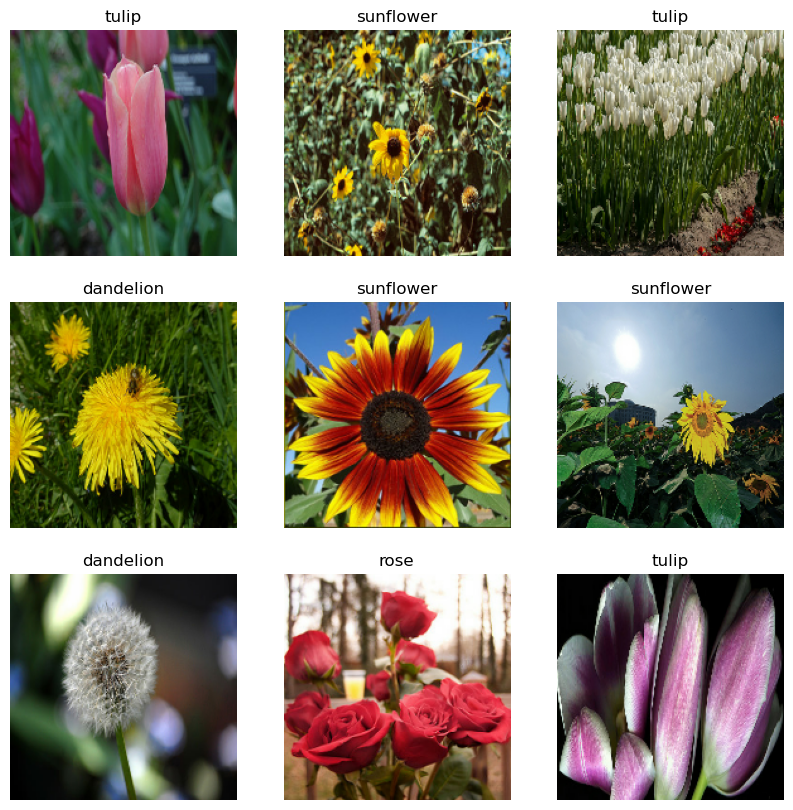

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [15]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break


(32, 180, 180, 3)
(32,)


C:\Users\parid\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


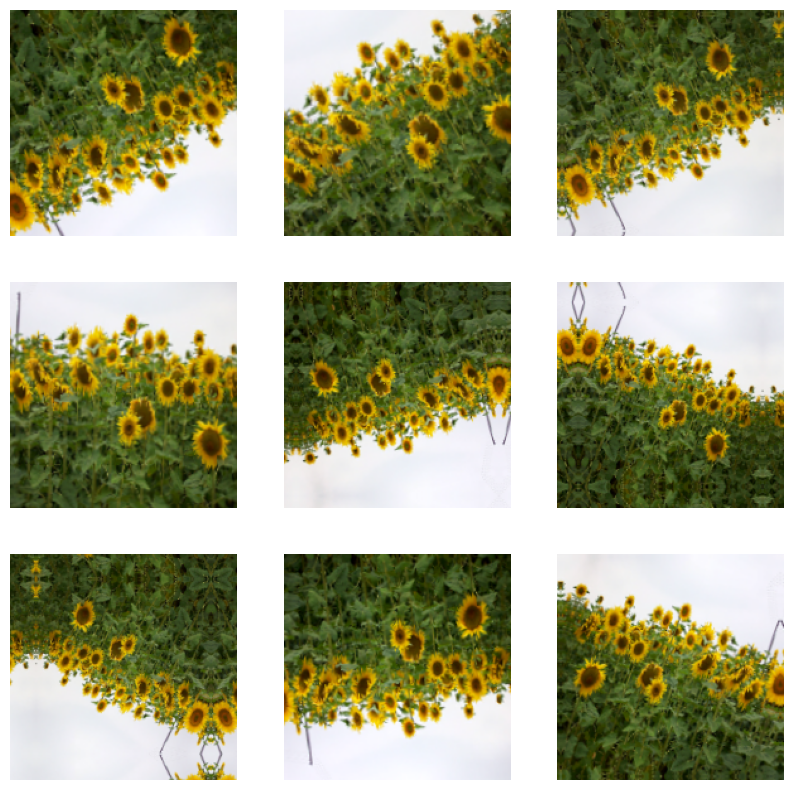

In [21]:
data_augmentation = keras.Sequential( 
    [
        layers.RandomFlip('horizontal', input_shape=(180, 180, 3)),
        layers.RandomRotation(0.1), 
        layers.RandomZoom(0.3), layers.RandomContrast(0.1),
        layers.RandomFlip('vertical'),
    ] 
)
plt.figure(figsize=(10,10)) 
for images, _ in train_ds.take(1): 
  for i in range(9): 
    augmented_images = data_augmentation(images) 
    plt.subplot(3, 3, i+1) 
    plt.imshow(augmented_images[0].numpy().astype('uint8')) 
    plt.axis('off')
plt.show()

In [23]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping


batch_size = 32
img_height = 180
img_width = 180


train_ds = tf.keras.utils.image_dataset_from_directory(
    "Images/",  
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
    "Images/",  
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)


AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


Found 4318 files belonging to 5 classes.
Using 3455 files for training.
Found 4318 files belonging to 5 classes.
Using 863 files for validation.


In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(224, 224),  # Resize images to 224x224
    batch_size=32,
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(224, 224),  # Resize images to 224x224
    batch_size=32,
)


Found 4318 files belonging to 5 classes.
Using 3455 files for training.
Found 4318 files belonging to 5 classes.
Using 863 files for validation.
Image batch shape: (32, 180, 180, 3), Labels batch shape: (32,)
Dataset is clean!
Dataset is clean!
Epoch 1/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 24s 182ms/step - accuracy: 0.3151 - loss: 1.5053 - val_accuracy: 0.4357 - val_loss: 1.2488
Epoch 2/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 23s 217ms/step - accuracy: 0.5195 - loss: 1.1577 - val_accuracy: 0.5110 - val_loss: 1.2003
Epoch 3/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 25s 234ms/step - accuracy: 0.5889 - loss: 1.0657 - val_accuracy: 0.5597 - val_loss: 1.0424
Epoch 4/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 25s 234ms/step - accuracy: 0.6137 - loss: 0.9853 - val_accuracy: 0.5863 - val_loss: 1.0104
Epoch 5/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 25s 235ms/step - accuracy: 0.6314 - loss: 0.9328 - val_accuracy: 0.5840 - val_loss: 1.0096
Epoch 6/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 26s 240ms/step - accuracy: 0.6495 - loss: 0.8957 - val

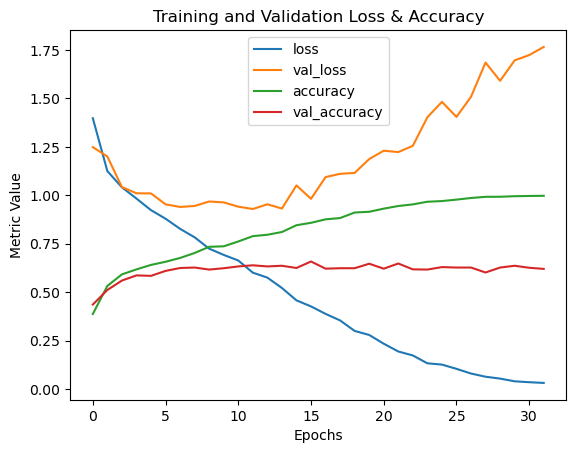

In [51]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
import matplotlib.pyplot as plt

num_classes = 5
image_size = (180, 180)


early_stopping = EarlyStopping(
    min_delta=0.001,
    patience=20,  
    restore_best_weights=True,
)


train_ds = tf.keras.utils.image_dataset_from_directory(
    "Images/",
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=image_size,
    batch_size=32,
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    "Images/",
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=image_size,
    batch_size=32,
)


for images, labels in train_ds.take(1):
    print(f"Image batch shape: {images.shape}, Labels batch shape: {labels.shape}")


def check_for_nan_in_dataset(dataset):
    for images, labels in dataset.take(1): 
        images = tf.cast(images, tf.float32)  
        labels = tf.cast(labels, tf.float32) 
        if tf.reduce_any(tf.math.is_nan(images)) or tf.reduce_any(tf.math.is_nan(labels)):
            print("NaN values found!")
            return True
        else:
            print("Dataset is clean!")
            return False
    return False


check_for_nan_in_dataset(train_ds)
check_for_nan_in_dataset(val_ds)


AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


model = Sequential([
    layers.Input(shape=(180, 180, 3)),
    layers.Rescaling(1.0 / 255),
    layers.Conv2D(16, 5, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=2, padding='same'),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=2, padding='same'),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=2, padding='same'),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=2, padding='same'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax'), 
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
    metrics=['accuracy'],
)



history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=100,
    callbacks=[early_stopping],
    verbose=1  
)


history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss', 'accuracy', 'val_accuracy']].plot()
plt.title("Training and Validation Loss & Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Metric Value")
plt.show()


In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models

#
num_classes = 5  


model1 = models.Sequential([
  layers.Input(shape=(224, 224, 3)),  # Specify the input shape here
  layers.Rescaling(1./255),
  layers.Conv2D(16, 5, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=2, padding='same'),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=2, padding='same'),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=2, padding='same'),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=2, padding='same'),
  layers.GlobalAveragePooling2D(),
  layers.Dense(num_classes, activation='softmax')  # For multi-class classification
])

model1.summary()

model1.compile(optimizer=tf.keras.optimizers.Adam(epsilon=0.0),
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 224, 224, 16)        │           1,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 112, 112, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 112, 112, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 56, 56, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 56, 56, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 98,853 (386.14 KB)

 Trainable params: 98,853 (386.14 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:


path='/pinkrose/Pink-Rose.webp'
img=image.load_img(path, target_size=(180, 180))

x=image.img_to_array(img)
test_img=np.expand_dims(x, axis=0)


result = model1.predict(test_img)
 pred = np.argmax(result) 

print(pred)